In [1]:
%load_ext autoreload
%autoreload 2

In [168]:
import os
import pickle
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
data_path = os.path.join("data","ml","Turkey.pkl")
df = pickle.load(open(data_path,"rb"))

In [170]:
df0 = df[~df["type_level_1"].isna()]
df0 = df0[df0["wsf"]!=0]

In [171]:
for index, row in df0.iterrows():
    tot = 0
    df0.loc[index,"points"] = len(row['geometry'].exterior.coords)

In [172]:
df0.head()

,height,orient,type_level_0,density,area,source,geometry,type_level_1,type_level_2,ntl,lcz,wsf,index_right,height_ghsl,city,points
3,3.0,67.0,Other buildings,1,907.775199,OSM,"POLYGON ((37.86608 41.00655, 37.86608 41.00655...",residential,residential,17.806099,6.0,255.0,1002.0,0.294880,Ordu,5.0
20,3.0,103.0,Other buildings,1,227.048737,OSM,"POLYGON ((37.86683 41.00785, 37.86689 41.00778...",residential,residential,18.114485,6.0,255.0,953.0,0.561674,Ordu,9.0
22,3.0,74.0,Other buildings,1,1764.693070,OSM,"POLYGON ((37.86709 41.00749, 37.86709 41.00749...",residential,residential,18.114485,6.0,255.0,953.0,0.561674,Ordu,7.0
28,3.0,119.0,Other buildings,1,289.374129,OSM,"POLYGON ((37.86759 41.00791, 37.86759 41.00791...",residential,residential,18.350260,6.0,255.0,954.0,0.587778,Ordu,9.0
30,3.0,115.0,Other buildings,1,345.895743,OSM,"POLYGON ((37.86766 41.00754, 37.86766 41.00754...",residential,residential,18.350260,6.0,255.0,954.0,0.587778,Ordu,12.0


In [173]:
df0["type_level_2"].value_counts()

residential    19889
others           552
industrial       535
commercial        74
Name: type_level_2, dtype: int64

In [187]:
feature = ["area","ntl",	"lcz",	"points"]
data= df0[feature+["type_level_2"]]
data = data.dropna()
X = data[feature]
y = data[["type_level_2"]]
X.head()

,area,ntl,lcz,points
3,907.775199,17.806099,6.0,5.0
20,227.048737,18.114485,6.0,9.0
22,1764.693070,18.114485,6.0,7.0
28,289.374129,18.350260,6.0,9.0
30,345.895743,18.350260,6.0,12.0


In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [190]:
#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

C:\Users\czhou\AppData\Local\Temp\ipykernel_22480\1123846608.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [191]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9537037037037037


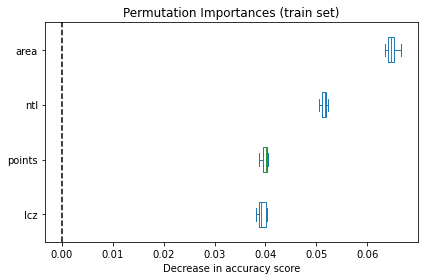

In [192]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()